### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/DF%20Spring%202023/Module%204-%20ARIMA/Module4-SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 4: SARIMAX

Let's add exogenous variables into our SARIMA model! 

Documentation: 

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **sktime** : https://www.sktime.org/en/stable/api_reference/forecasting.html

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [1]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

!pip install --pre pycaret

In [1]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.0.0.rc4'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [15]:
stocks = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/yfinance.csv", index_col=0, header=[0,1])
stocks.head()

Adj Close                                                 \
                 AAPL         GLD       MSFT         QQQ         SPY   
Date                                                                   
2018-01-02  40.950497  125.150002  80.940392  153.123489  246.766678   
2018-01-03  40.943367  124.820000  81.317093  154.611298  248.327499   
2018-01-04  41.133541  125.459999  82.032768  154.881836  249.374115   
2018-01-05  41.601864  125.330002  83.049835  156.437332  251.035934   
2018-01-08  41.447350  125.309998  83.134598  157.045990  251.495041   

                                      Close                         ...  \
                 TSLA        USO       AAPL         GLD       MSFT  ...   
Date                                                                ...   
2018-01-02  21.368668  96.559998  43.064999  125.150002  85.949997  ...   
2018-01-03  21.150000  98.720001  43.057499  124.820000  86.349998  ...   
2018-01-04  20.974667  98.959999  43.257500  125.459999  87.110001  ...   
2018-01-05  21.105333  98.480003  43.750000  125.330002  88.190002  ...   
2018-01-08  22.427334  99.040001  43.587502  125.309998  88.279999  ...   

                  Open                           Volume                      \
                   SPY       TSLA        USO       AAPL       GLD      MSFT   
Date                                                                          
2018-01-02  267.839996  20.799999  96.559998  102223600  11762500  22483800   
2018-01-03  268.959991  21.400000  97.360001  118071600   7904300  26061400   
2018-01-04  271.200012  20.858000  98.639999   89738400   7329700  21912000   
2018-01-05  272.510010  21.108000  98.239998   94640000   5739900  23407100   
2018-01-08  273.309998  21.066668  98.480003   82271200   3566700  22113000   

                                                    
                 QQQ       SPY       TSLA      USO  
Date                                                
2018-01-02  32573300  86655700   65283000  1497588  
2018-01-03  29383600  90070400   67822500  2156150  
2018-01-04  24776100  80636400  149194500  1480988  
2018-01-05  26992300  83524000   68868000  1609888  
2018-01-08  23159100  57319200  147891000  1229225  

[5 rows x 42 columns]

In [16]:
# if you are working with Pandas, your first job should be changing the type of the index to datetime and then to period! This is a compatibility issue with other packages. 
stocks.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
       ...
       '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
       '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30'],
      dtype='object', name='Date', length=1259)

In [17]:
stocks.index = pd.to_datetime(stocks.index).to_period('B')
stocks.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
             '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', name='Date', length=1259)

In [18]:
df = stocks['Close'][['AAPL', 'SPY', 'USO', 'GLD']]
df.head()

,AAPL,SPY,USO,GLD
Date,,,,
2018-01-02,43.064999,268.769989,96.559998,125.150002
2018-01-03,43.057499,270.470001,98.720001,124.820000
2018-01-04,43.257500,271.609985,98.959999,125.459999
2018-01-05,43.750000,273.420013,98.480003,125.330002
2018-01-08,43.587502,273.920013,99.040001,125.309998


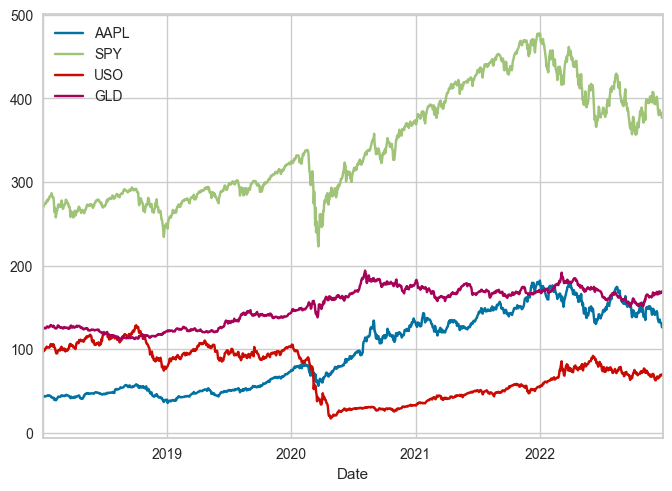

In [24]:
df.plot()
plt.show()

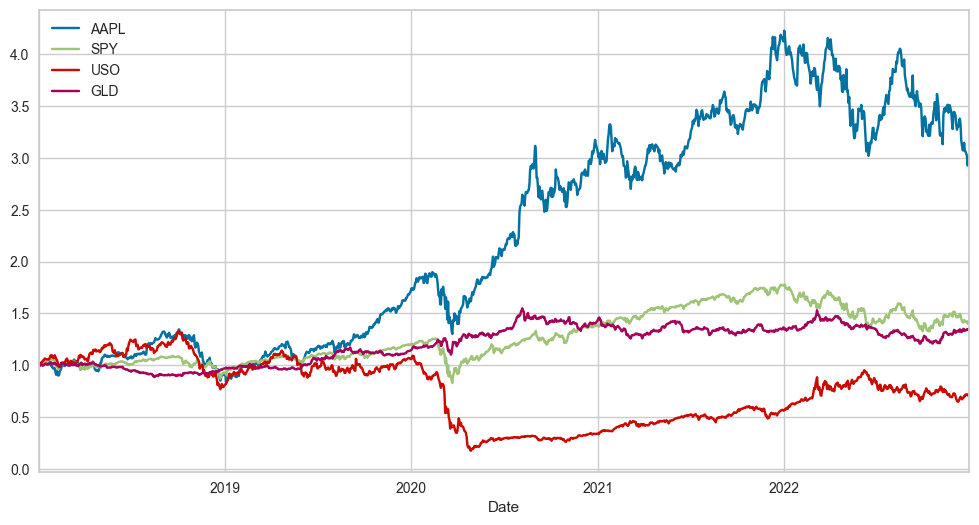

In [22]:
# let's plot the normolized data:
df.apply(lambda x: x/x[0]).plot(figsize=(12,6))
plt.show()

In [25]:
df.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
             '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', name='Date', length=1259)

In [26]:
idx = pd.period_range(min(df.index), max(df.index))
idx

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-15',
             ...
             '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
             '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', length=1304)

In [27]:
df.index.symmetric_difference(idx)

PeriodIndex(['2018-01-15', '2018-02-19', '2018-03-30', '2018-05-28',
             '2018-07-04', '2018-09-03', '2018-11-22', '2018-12-05',
             '2018-12-25', '2019-01-01', '2019-01-21', '2019-02-18',
             '2019-04-19', '2019-05-27', '2019-07-04', '2019-09-02',
             '2019-11-28', '2019-12-25', '2020-01-01', '2020-01-20',
             '2020-02-17', '2020-04-10', '2020-05-25', '2020-07-03',
             '2020-09-07', '2020-11-26', '2020-12-25', '2021-01-01',
             '2021-01-18', '2021-02-15', '2021-04-02', '2021-05-31',
             '2021-07-05', '2021-09-06', '2021-11-25', '2021-12-24',
             '2022-01-17', '2022-02-21', '2022-04-15', '2022-05-30',
             '2022-06-20', '2022-07-04', '2022-09-05', '2022-11-24',
             '2022-12-26'],
            dtype='period[B]')

In [28]:
df = df.reindex(idx, fill_value=np.nan)
df.tail()

,AAPL,SPY,USO,GLD
2022-12-26,NaN,NaN,NaN,NaN
2022-12-27,130.029999,381.399994,69.529999,168.669998
2022-12-28,126.040001,376.660004,68.580002,167.910004
2022-12-29,129.610001,383.440002,68.529999,168.850006
2022-12-30,129.929993,382.429993,70.110001,169.639999


In [29]:
df = df.fillna(method = 'ffill')
df.tail(10)

,AAPL,SPY,USO,GLD
2022-12-19,132.369995,380.019989,66.070000,166.320007
2022-12-20,132.300003,380.540009,66.220001,169.080002
2022-12-21,135.449997,386.230011,68.059998,168.800003
2022-12-22,132.229996,380.720001,67.699997,166.759995
2022-12-23,131.860001,382.910004,69.320000,167.259995
2022-12-26,131.860001,382.910004,69.320000,167.259995
2022-12-27,130.029999,381.399994,69.529999,168.669998
2022-12-28,126.040001,376.660004,68.580002,167.910004
2022-12-29,129.610001,383.440002,68.529999,168.850006
2022-12-30,129.929993,382.429993,70.110001,169.639999


Setting up PyCaret Experiment:

In [31]:
from pycaret.time_series import *

In [56]:
exp = TSForecastingExperiment()
exp.setup(data = df, target='AAPL' ,  fh = 12, coverage=0.95)

,Description,Value
0,session_id,6147
1,Target,AAPL
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(1304, 4)"
5,Transformed data shape,"(1304, 4)"
6,Transformed train set shape,"(1292, 4)"
7,Transformed test set shape,"(12, 4)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


---
### Auto ARIMA
https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.forecasting.arima.AutoARIMA.html

Wrapper of the pmdarima implementation of fitting Auto-(S)ARIMA(X) models. The auto-ARIMA algorithm seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model. This process is based on the commonly-used R function, forecast::auto.arima.

Auto-ARIMA works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto-ARIMA also seeks to identify the optimal P and Q hyper-parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

In order to find the best model, auto-ARIMA optimizes for a given information_criterion, one of (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’) (Akaike Information Criterion, Corrected Akaike Information Criterion, Bayesian Information Criterion, Hannan-Quinn Information Criterion, or “out of bag”–for validation scoring–respectively) and returns the ARIMA which minimizes the value


In [57]:
auto_arima = exp.create_model('auto_arima', cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.4497,1.0928,4.5581,4.9027,0.0348,0.0341,-2.2767


In [35]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1292
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2234.137
Date:                Wed, 22 Feb 2023   AIC                           4476.274
Time:                        12:16:04   BIC                           4496.927
Sample:                    01-02-2018   HQIC                          4484.026
                         - 12-14-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SPY            0.3963      0.006     61.805      0.000       0.384       0.409
USO           -0.1020      0.024     -4.296      0.000      -0.149      -0.055
GLD            0.0447      0.021      2.088      0.037       0.003       0.087
sigma2         1.8649      0.038     48.520      0.000       1.790       1.940
===================================================================================
Ljung-Box (L1) (Q):                   2.41   Jarque-Bera (JB):              1774.51
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               5.01   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
exp.plot_model([auto_arima], plot='insample')

In [44]:
exp.plot_model([auto_arima], plot='forecast')

---
## Predict Model

This function predicts Label using a trained model. When data is None, it predicts label on the holdout set.

note: so far, our best model is the ets model


In [45]:
holdout_pred = exp.predict_model(auto_arima)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Auto ARIMA,1.4497,1.0928,4.5581,4.9027,0.0348,0.0341,-2.2767


## Finalize Model

This function trains a given estimator on the entire dataset including the holdout set.

Model finalization is the last step in the experiment. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample. The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [46]:
final_model = exp.finalize_model(auto_arima)

In [47]:
final_model

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                AutoARIMA(random_state=8662,
                                                                          sp=5,
                                                                          suppress_warnings=True))]))])

---
## Final prediciton on unseen data

The predict_model() function is also used to predict on the unseen dataset.

In [48]:
exp.plot_model(plot='train_test_split')

In [50]:
unseen_predictions = exp.predict_model(final_model, fh=12)
unseen_predictions

ValueError: Model was trained with exogenous variables but you have not passed any for predictions. Please pass exogenous variables to make predictions.

In [53]:
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,1.0644,0.8886,3.2937,3.9251,0.0231,0.0226,-0.0896,3.0133
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.3653,1.0506,4.2370,4.6556,0.0292,0.0290,-1.7307,0.1900
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.3741,1.1549,4.2541,5.1054,0.0299,0.0291,-0.8047,0.3500
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.4217,1.1882,4.4042,5.2559,0.0308,0.0300,-1.2569,0.2033
arima,ARIMA,1.4469,1.1941,4.4821,5.2806,0.0312,0.0306,-1.5287,0.1967
naive,Naive Forecaster,1.4586,1.1800,4.5164,5.2152,0.0315,0.0308,-1.0148,0.0533
croston,Croston,1.5262,1.2137,4.7424,5.3861,0.0326,0.0325,-3.0218,0.0667
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.5938,1.2846,4.9366,5.6797,0.0346,0.0336,-1.3989,0.1433
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.6125,1.3207,4.9938,5.8396,0.0348,0.0340,-1.6245,0.2967
par_cds_dt,Passive Aggressive w/ Cond. Deseasonalize & Detrending,1.6516,1.3263,5.1298,5.8809,0.0349,0.0357,-2.9185,0.1467


AutoARIMA(random_state=8662, sp=5, suppress_warnings=True)